In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

#Ensure pydotplus is installed
import pydotplus
import imageio
import io
from scipy import misc

%matplotlib inline

# Spotify Song Attributes EDA

- Import Dataset
- EDA to visualize data and observe structure
- Train a classifier (Decision Tree)
- Predict target using the trained classifier

In [2]:
data = pd.read_csv('Spotify_data.csv')

In [3]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
data.sample(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
752,752,0.0416,0.348,223227,0.8560,0.00000,2,0.2030,-3.216,0,0.0979,188.046,4.0,0.261,1,Fall In Love,Phantogram
1248,1248,0.4980,0.331,255173,0.4270,0.00000,3,0.1080,-7.431,1,0.0302,157.938,3.0,0.129,0,Oh My Soul,Casting Crowns
612,612,0.0482,0.653,141724,0.8170,0.00000,1,0.1570,-5.077,1,0.2390,135.345,4.0,0.493,1,Molly Ringwald,Danny Brown
1845,1845,0.3070,0.556,251253,0.5170,0.00115,9,0.0770,-8.769,1,0.0287,169.938,4.0,0.779,0,I Knew I Loved You,Savage Garden
1856,1856,0.9650,0.710,275280,0.0565,0.00000,7,0.0889,-15.099,1,0.0534,123.994,4.0,0.352,0,Lost Boy,Ruth B.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [6]:
train, test = train_test_split(data, test_size = 0.2)

In [7]:
print("Training size {}; Test size: {}".format(len(train), len(test)))

Training size 1613; Test size: 404


In [8]:
train.shape

(1613, 17)

In [9]:
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
pos_tempo=data[data['target']==1]['tempo']
neg_tempo=data[data['target']==0]['tempo']
pos_dance=data[data['target']==0]['danceability']
neg_dance=data[data['target']==0]['danceability']
pos_duration=data[data['target']==0]['duration_ms']
neg_duration=data[data['target']==0]['duration_ms']
pos_loudness=data[data['target']==0]['loudness']
neg_loudness=data[data['target']==0]['loudness']
pos_speechiness=data[data['target']==0]['speechiness']
neg_speechiness=data[data['target']==0]['speechiness']
pos_valence=data[data['target']==0]['valence']
neg_valence=data[data['target']==0]['valence']
pos_energy=data[data['target']==0]['energy']
neg_energy=data[data['target']==0]['energy']
pos_acousticness=data[data['target']==0]['acousticness']
neg_acousticness=data[data['target']==0]['acousticness']
pos_key=data[data['target']==0]['key']
neg_key=data[data['target']==0]['key']
pos_instrumentalness=data[data['target']==0]['instrumentalness']
neg_instrumentalness=data[data['target']==0]['instrumentalness']




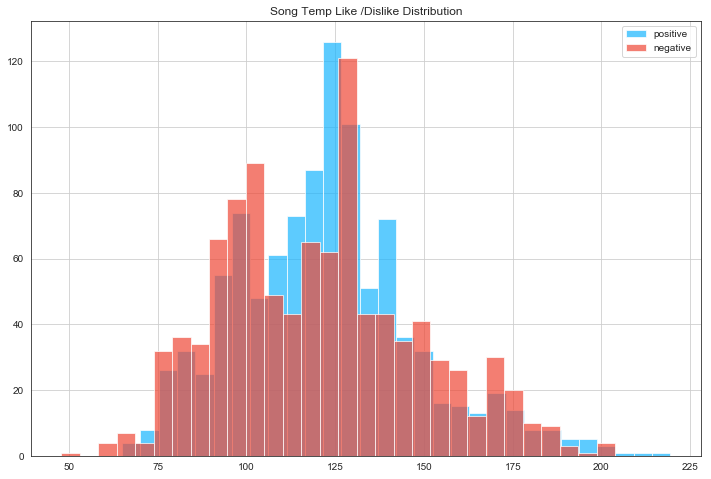

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Temp Like /Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins = 30, label='positive')
neg_tempo.hist(alpha=0.7, bins = 30, label='negative')
plt.legend(loc = "upper right")


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

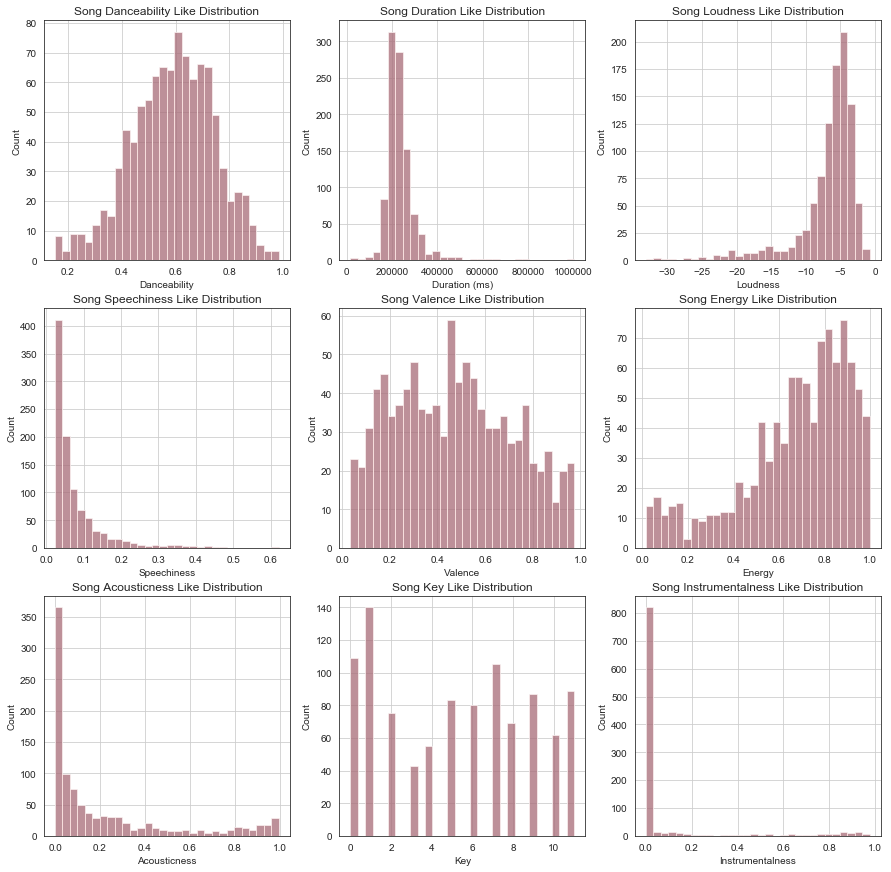

In [12]:
fig2 = plt.figure(figsize=(15,15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Count")
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel("Duration (ms)")
ax5.set_ylabel("Count")
ax5.set_title("Song Duration Like Distribution")
pos_duration.hist(alpha=0.5, bins=30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel("Loudness")
ax7.set_ylabel("Count")
ax7.set_title("Song Loudness Like Distribution")
pos_loudness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax7 = fig2.add_subplot(334)
ax7.set_xlabel("Speechiness")
ax7.set_ylabel("Count")
ax7.set_title("Song Speechiness Like Distribution")
pos_speechiness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax7 = fig2.add_subplot(335)
ax7.set_xlabel("Valence")
ax7.set_ylabel("Count")
ax7.set_title("Song Valence Like Distribution")
pos_valence.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax7 = fig2.add_subplot(336)
ax7.set_xlabel("Energy")
ax7.set_ylabel("Count")
ax7.set_title("Song Energy Like Distribution")
pos_energy.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Acousticness
ax7 = fig2.add_subplot(337)
ax7.set_xlabel("Acousticness")
ax7.set_ylabel("Count")
ax7.set_title("Song Acousticness Like Distribution")
pos_acousticness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(337)
neg_acousticness.hist(alpha=0.5, bins=30)

# Key
ax7 = fig2.add_subplot(338)
ax7.set_xlabel("Key")
ax7.set_ylabel("Count")
ax7.set_title("Song Key Like Distribution")
pos_key.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(338)
neg_key.hist(alpha=0.5, bins=30)

# Instrumentalness
ax7 = fig2.add_subplot(339)
ax7.set_xlabel("Instrumentalness")
ax7.set_ylabel("Count")
ax7.set_title("Song Instrumentalness Like Distribution")
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax8 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


# Spotify Decision Tree Classifier

In [13]:
model = DecisionTreeClassifier(min_samples_split=200)

In [14]:
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms"]

In [15]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

In [16]:
dt = model.fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) *100

In [19]:
print("Accuracy using Decisidefon Tree:", round(score,1),"%")

Accuracy using Decisidefon Tree: 72.0 %


In [20]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    #img=misc.imread(path)
    img = imageio.imread( path )
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)



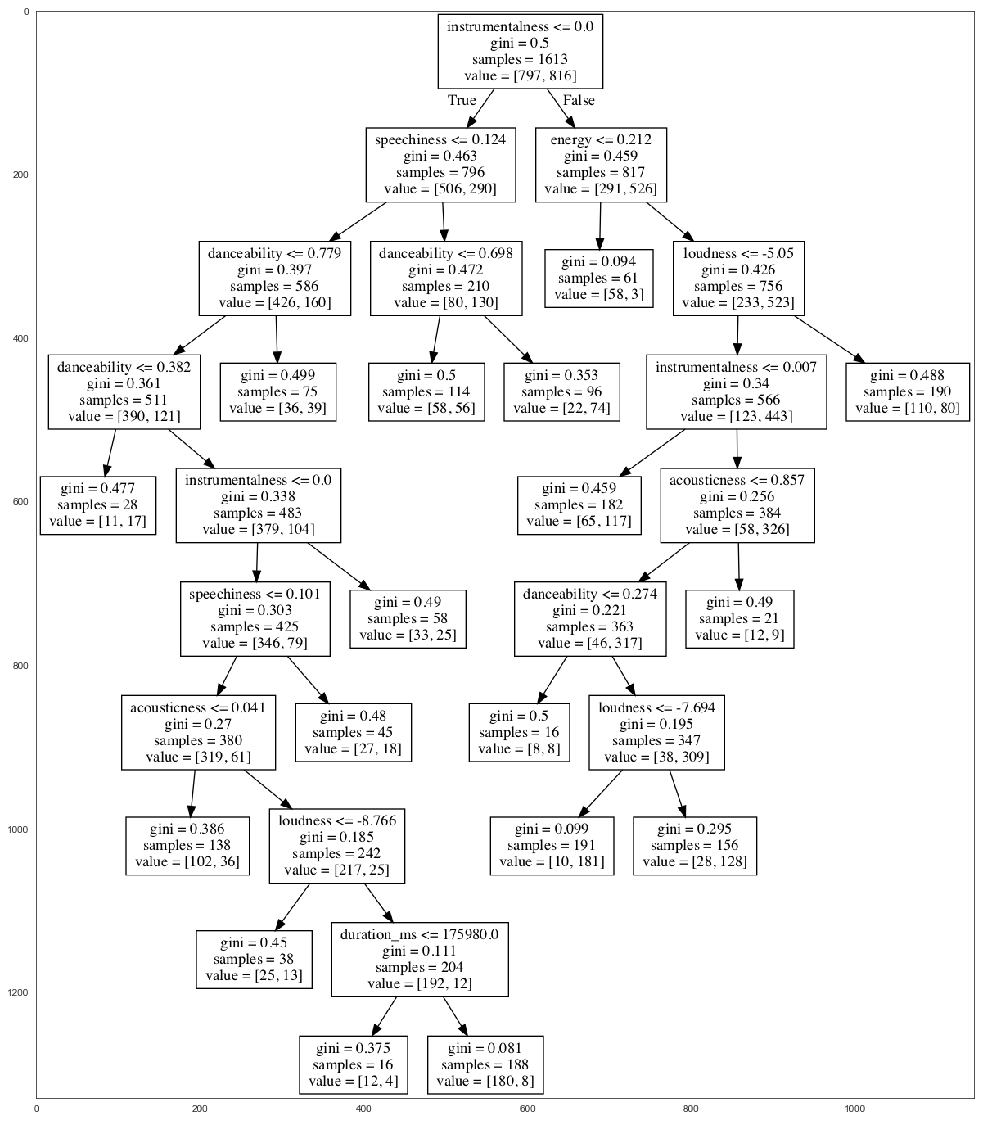

In [21]:
show_tree(dt, features, 'dec_tree_01.png')